In [1]:
!pip install stargazer

In [2]:
import pandas as pd
import numpy as np
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file):
    full_path = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv" + file

    return pd.read_stata(full_path)


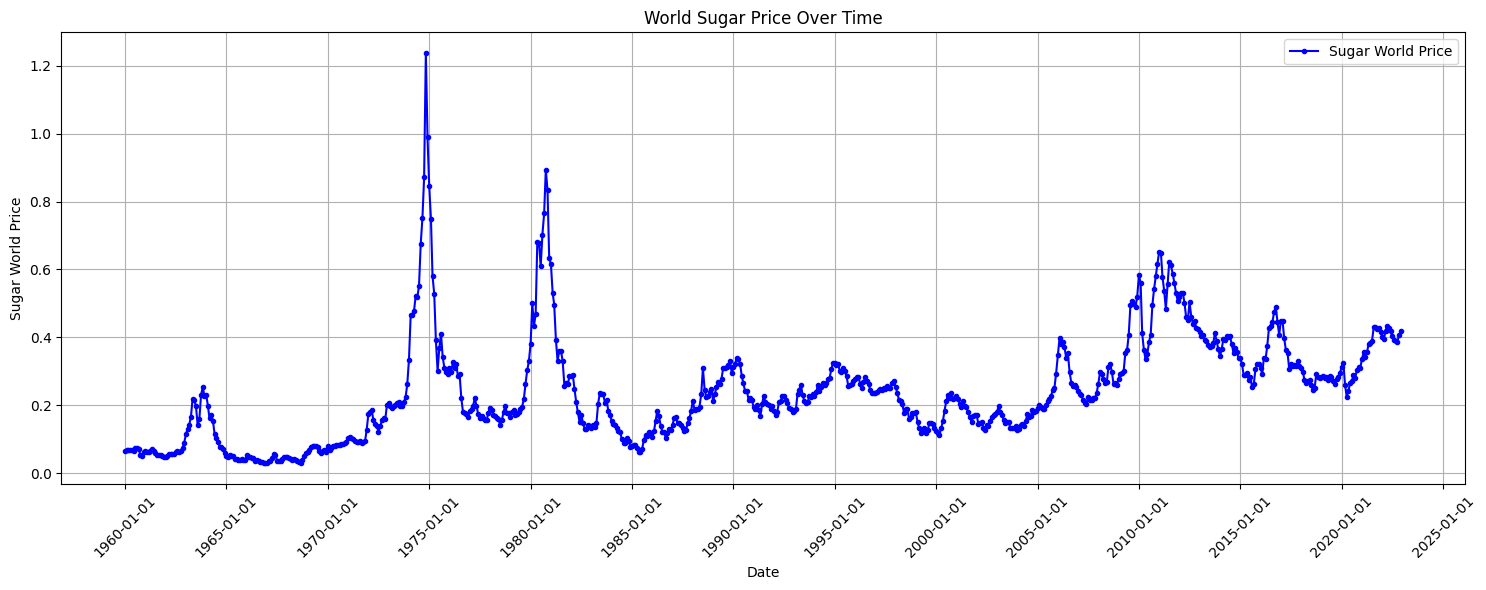

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv"
sugar_data = pd.read_csv(url)

# Convert the 'date' column to datetime format
sugar_data['date'] = pd.to_datetime(sugar_data['date'])

# Plotting with specific date format on the x-axis
plt.figure(figsize=(15, 6))
plt.plot(sugar_data['date'], sugar_data['sugar_world'], label='Sugar World Price', color='blue', marker='o', markersize=3)
plt.title('World Sugar Price Over Time')
plt.xlabel('Date')
plt.ylabel('Sugar World Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show ticks every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





In [6]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv"
sugar_data = pd.read_csv(url)

# Convert the 'date' column to datetime format
sugar_data['date'] = pd.to_datetime(sugar_data['date'])

# Filter the dataset for December 1, 1974
dec_1_1974_data = sugar_data[sugar_data['date'] == '1974-04-01']

# Display the data point
print(dec_1_1974_data)


     Unnamed: 0       date  sugar_eu  sugar_us  sugar_world
171         171 1974-04-01  0.195329  0.424169       0.4762


In [14]:
total_data_points = sugar_data.size
print(total_data_points)

3780


In [28]:
dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat['x2'] = dat['x']**2
dat['x3'] = dat['x']**3
dat['D'] = 0
dat.loc[dat.x>170, 'D'] = 1

dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280]

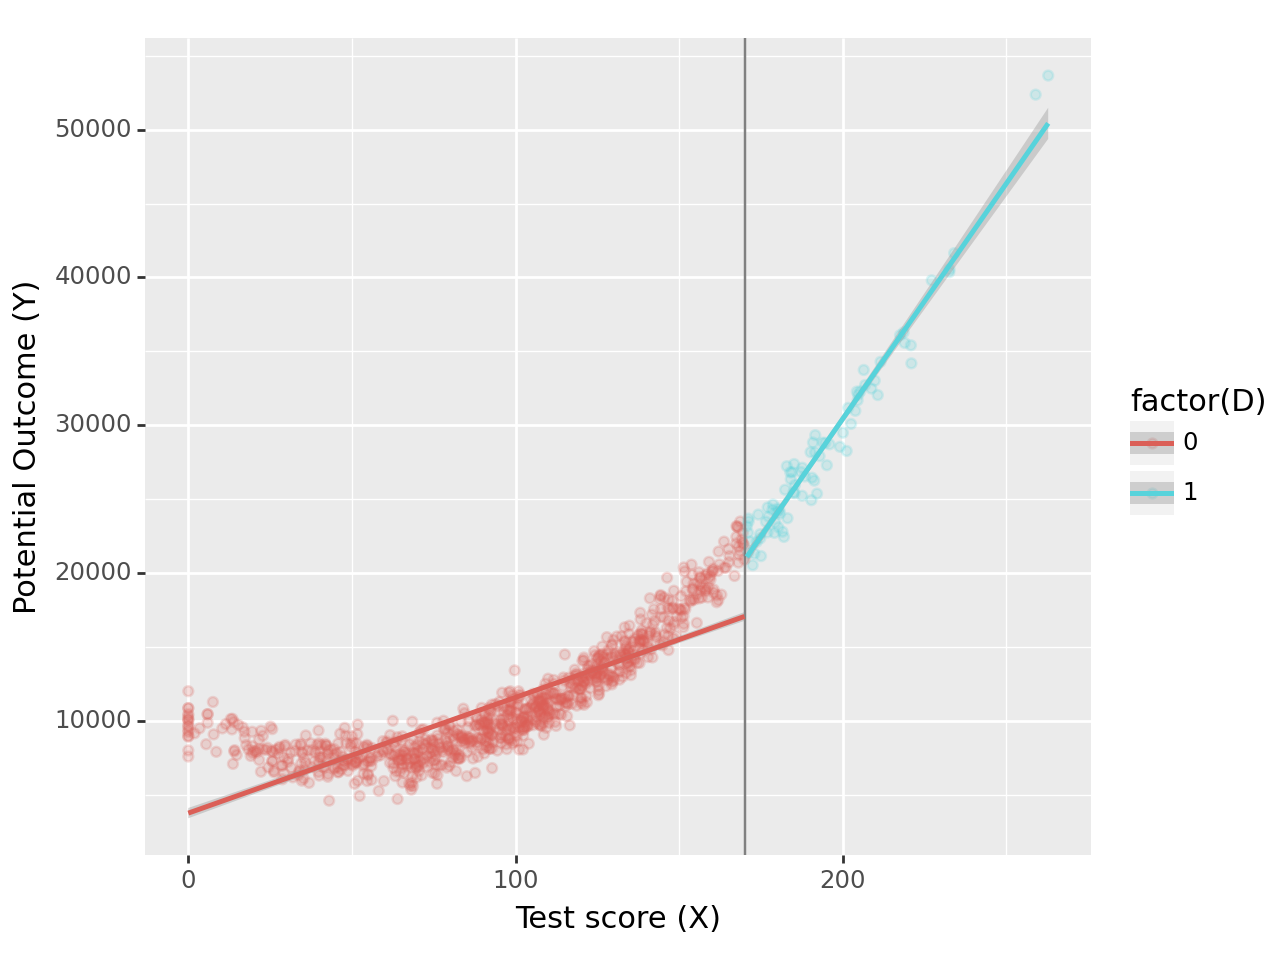

<Figure Size: (640 x 480)>

In [29]:
# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.2) +\
    p.geom_vline(xintercept = 170, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

In [31]:
np.random.seed(12282020)

# Fully interacted regression
all_columns = "+".join(dat.columns.difference(["D", 'y3']))
formula = 'y3 ~ D * ({})'.format(all_columns)

regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     5653.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:13:38   Log-Likelihood:                -8307.1
No. Observations:                1000   AIC:                         1.663e+04
Df Residuals:                     992   BIC:                         1.667e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9954.1600    170.698     58.314      0.000    9619.189    1.03e+04
D          -5.012e+04   7.58e+04     -0.662      0.508   -1.99e+05    9.85e+04
x           -105.8744      7.568    -13.990      0.000    -120.725     -91.024
x2             1.1015      0.099     11.179      0.000       0.908       1.295
x3            -0.0003      0.000     -0.918      0.359      -0.001       0.000
D:x          755.3833   1088.366      0.694      0.488   -1380.381    2891.148
D:x2          -3.8254      5.167     -0.740      0.459     -13.965       6.314
D:x3           0.0065      0.008      0.800      0.424      -0.009       0.022
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.753
Skew:                          -0.008   Prob(JB):                        0.686
Kurtosis:                       2.867   Cond. No.                     8.35e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""